# Consumer Complain Classification 

The dataset represents consumer complaints about the number of products. Student loan and Bank account or service are products. The RNN has to classify consumer complaints are text data.

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import accuracy_score
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Activation,LSTM
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Embedding,SpatialDropout1D
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df = pd.read_csv(r"/content/drive/MyDrive/RNN/Analysis _Consumer_complaint_using RNN/Consumer_Complaints (1).csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,6,11,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,06/07/2019,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,NaN,Company has responded to the consumer and the ...,Army and Air Force Exchange Service,AL,358XX,NaN,Consent not provided,Web,06/07/2019,Closed with explanation,Yes,NaN,3267335
1,06/07/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"Bank of CFPB, Washington, DC CFPB PIV",DC,20552,Servicemember,NaN,Web,06/07/2019,Closed with explanation,Yes,NaN,3267169
2,06/07/2019,Debt collection,Other debt,False statements or representation,Attempted to collect wrong amount,NaN,Company believes it acted appropriately as aut...,Monterey Financial Services LLC,MN,55014,NaN,Consent not provided,Web,06/07/2019,Closed with explanation,Yes,NaN,3266966
3,06/07/2019,Debt collection,Other debt,Communication tactics,Frequent or repeated calls,NaN,NaN,ALLY FINANCIAL INC.,NJ,07103,NaN,NaN,Phone,06/07/2019,In progress,Yes,NaN,3267618
4,06/07/2019,Debt collection,Other debt,False statements or representation,Indicated you were committing crime by not pay...,NaN,Company has responded to the consumer and the ...,"Convergent Resources, Inc.",NJ,071XX,NaN,NaN,Web,06/07/2019,Closed with explanation,Yes,NaN,3267687


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303617 entries, 0 to 1303616
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Date received                 1303617 non-null  object
 1   Product                       1303617 non-null  object
 2   Sub-product                   1068451 non-null  object
 3   Issue                         1303617 non-null  object
 4   Sub-issue                     769820 non-null   object
 5   Consumer complaint narrative  384865 non-null   object
 6   Company public response       460903 non-null   object
 7   Company                       1303617 non-null  object
 8   State                         1283431 non-null  object
 9   ZIP code                      1185291 non-null  object
 10  Tags                          178463 non-null   object
 11  Consumer consent provided?    700309 non-null   object
 12  Submitted via                 1303617 non-

In [5]:
df.Product.value_counts()

Mortgage                                                                        279773
Debt collection                                                                 248580
Credit reporting, credit repair services, or other personal consumer reports    236660
Credit reporting                                                                140432
Credit card                                                                      89190
Bank account or service                                                          86206
Student loan                                                                     52166
Credit card or prepaid card                                                      49515
Checking or savings account                                                      42364
Consumer Loan                                                                    31605
Vehicle loan or lease                                                            11796
Money transfer, virtual currency, or money 

# Filtering observations and columns we wanted to train the model 

In [6]:
df.loc[df["Product"]== 'Credit reporting', 'Product'] = "Credit reporting, credit repair services, or other personal consumer reports"
df.loc[df["Product"]== 'Credit card', 'Product'] = "Credit card or prepaid card"
df.loc[df['Product'] == 'Payday loan', 'Product'] = 'Payday loan, title loan, or personal loan'
df.loc[df['Product'] == 'Virtual currency', 'Product'] = 'Money transfer, virtual currency, or money service'


In [7]:
df = df[df.Product != 'Other financial service']

In [8]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [9]:
# Filtering two columns one column is for input and another one is for output
df_consumer = df.loc[:,["Consumer complaint narrative","Product"]]


In [10]:
# Drop observations which is NAN
df_consumer  = df_consumer.dropna()

In [11]:
#Taking observations only three categories
df_Credit = df_consumer.loc[df_consumer['Product'] == "Credit card or prepaid card", :]
df_bank = df_consumer.loc[df_consumer['Product'] == "Bank account or service", :]
df_student = df_consumer.loc[df_consumer['Product'] == "Student loan", :]

# Merging observations of three categories
df_consumer =pd.concat([df_Credit,df_bank,df_student])

In [12]:
df_consumer.head()

,Consumer complaint narrative,Product
54389,Payments have been made and cleared on my XXXX...,Credit card or prepaid card
55097,On or about XX/XX/XXXX I submitted a complaint...,Credit card or prepaid card
55147,I wanted to make a payment on my due date of X...,Credit card or prepaid card
56059,On XX/XX/XXXX I had 5 separate charges from XX...,Credit card or prepaid card
56732,American Express closed my account based on an...,Credit card or prepaid card


# Cleaning the data Set 

In [13]:
# Reset the index of dataframe
df_consumer = df_consumer.reset_index(drop=True)

In [14]:
df_consumer.head()

,Consumer complaint narrative,Product
0,Payments have been made and cleared on my XXXX...,Credit card or prepaid card
1,On or about XX/XX/XXXX I submitted a complaint...,Credit card or prepaid card
2,I wanted to make a payment on my due date of X...,Credit card or prepaid card
3,On XX/XX/XXXX I had 5 separate charges from XX...,Credit card or prepaid card
4,American Express closed my account based on an...,Credit card or prepaid card


In [15]:
# Create a pattern to filter
repalce_space = re.compile('[/(){}\[\]\|@,;]')
#remove_bad_symbols = re.compile('[^a-zA-Z ]')
remove_bad_symbols = re.compile('[^0-9a-z #+_]')
stop_words = set(stopwords.words('english'))

In [16]:
def clean_text(text):
    #lowercase text
    text = text.lower() 
    # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = repalce_space.sub(' ', text)
    # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
    text = remove_bad_symbols.sub('', text)  
    text = text.replace('x', '')
    #text = re.sub(r'\W+', '', text)
    # remove stopwors from text
    text = ' '.join(word for word in text.split() if word not in stop_words) 
    return text

In [17]:
# Clean the data set
df_consumer['Consumer complaint narrative'] = df_consumer['Consumer complaint narrative'].apply(clean_text)
df_consumer['Consumer complaint narrative'] = df_consumer['Consumer complaint narrative'].str.replace('\d+', '')

<ipython-input-17-c6c905953984>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_consumer['Consumer complaint narrative'] = df_consumer['Consumer complaint narrative'].str.replace('\d+', '')


# The Following code create word clouds from the dataset and Visualize

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
stop_word = set(STOPWORDS)


def generate_wordcloud(text,title = None): 
    
    #Creating wordcloud object and getting list of frequent words from text
    wordcloud = WordCloud(background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          scale=3,
                          stopwords = stop_word,).generate(text)
    
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
   
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.show()



# Visualizing most frequent words in the "Credit card or prepaid card" category

In [19]:
df_Credit["Consumer complaint narrative"] = df_Credit["Consumer complaint narrative"].apply(clean_text)
df_Credit["Consumer complaint narrative"] = df_Credit["Consumer complaint narrative"].str.replace('\d+', '')


<ipython-input-19-f306b1be934a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Credit["Consumer complaint narrative"] = df_Credit["Consumer complaint narrative"].str.replace('\d+', '')


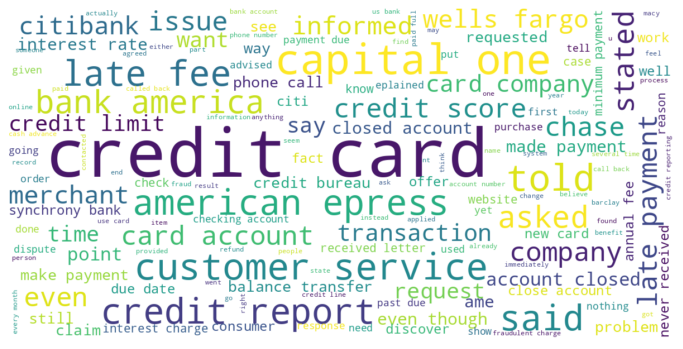

In [20]:
generate_wordcloud(' '.join(df_Credit.iloc[:,0]))

We  can notic that frequency words in Credit card or prepaid card category 

## Visualizing most frequent words in the "Bank account or service" category



In [21]:
df_bank["Consumer complaint narrative"] = df_bank["Consumer complaint narrative"].apply(clean_text)
df_bank["Consumer complaint narrative"] = df_bank["Consumer complaint narrative"].str.replace('\d+', '')

<ipython-input-21-10b517096e1d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_bank["Consumer complaint narrative"] = df_bank["Consumer complaint narrative"].str.replace('\d+', '')


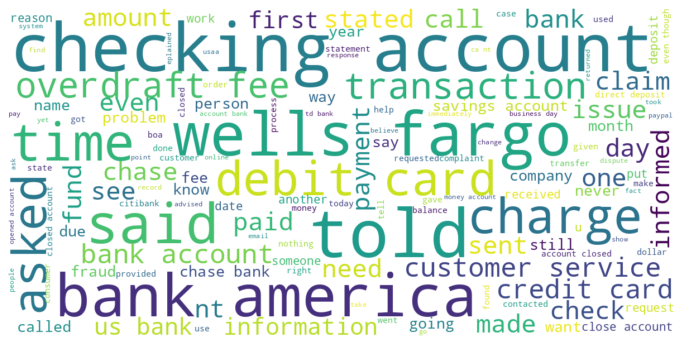

In [22]:
generate_wordcloud(' '.join(df_bank.iloc[:,0]))

 WE can notice that frequency words in Bank account or service category 

### Visualizing most frequent words in the "Student loan" category

<ipython-input-23-5e970d4fc254>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_student["Consumer complaint narrative"] = df_student["Consumer complaint narrative"].str.replace('\d+', '')


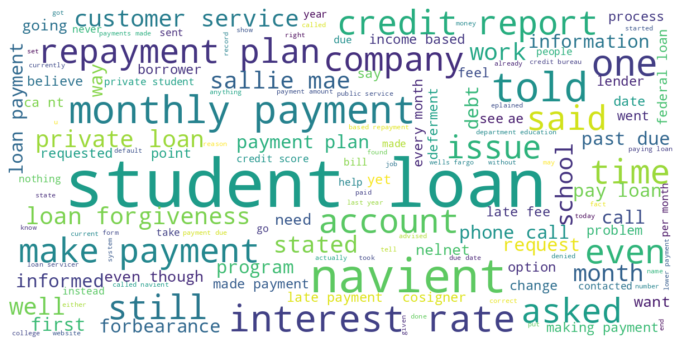

In [23]:
df_student["Consumer complaint narrative"] = df_student["Consumer complaint narrative"].apply(clean_text)
df_student["Consumer complaint narrative"] = df_student["Consumer complaint narrative"].str.replace('\d+', '')
generate_wordcloud(' '.join(df_student.iloc[:,0]))

we can notice that frequency words in "STundent Loan " Category


# TOkenizing the words 

In [24]:
# The maximum number of words to be used. (most frequent)
max_no_words = 25000


# Max number of words in each complaint.
max_seq_len = 250


# Create tokenizer object
tokenizer = Tokenizer(num_words=max_no_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)


# Fit the tokenizer on text data
tokenizer.fit_on_texts(df_consumer['Consumer complaint narrative'].values)


# Count how many unique tokes are in these observations
word_index = tokenizer.word_index
print('Number of unique tokens %s' % len(word_index))

Number of unique tokens 60897


In [25]:
word_index

{'account': 1,
 'credit': 2,
 'card': 3,
 'would': 4,
 'payment': 5,
 'bank': 6,
 'told': 7,
 'loan': 8,
 'called': 9,
 'payments': 10,
 'time': 11,
 'received': 12,
 'pay': 13,
 'interest': 14,
 'one': 15,
 'nt': 16,
 'balance': 17,
 'never': 18,
 'back': 19,
 'loans': 20,
 'made': 21,
 'could': 22,
 'get': 23,
 'said': 24,
 'due': 25,
 'information': 26,
 'call': 27,
 'amount': 28,
 'money': 29,
 'paid': 30,
 'also': 31,
 'late': 32,
 'company': 33,
 'month': 34,
 'since': 35,
 'make': 36,
 'days': 37,
 'phone': 38,
 'service': 39,
 'navient': 40,
 'customer': 41,
 'asked': 42,
 'sent': 43,
 'even': 44,
 'letter': 45,
 'check': 46,
 'years': 47,
 'charge': 48,
 'chase': 49,
 'still': 50,
 'number': 51,
 'fee': 52,
 'charges': 53,
 'months': 54,
 'fees': 55,
 'student': 56,
 'report': 57,
 'closed': 58,
 'new': 59,
 'help': 60,
 'charged': 61,
 'statement': 62,
 'day': 63,
 'first': 64,
 'email': 65,
 'us': 66,
 'another': 67,
 'like': 68,
 'online': 69,
 'contacted': 70,
 'accounts':

In [26]:
# Text to sequences 
X = tokenizer.texts_to_sequences(df_consumer['Consumer complaint narrative'].values)

# Padding the sequences
X = pad_sequences(X, maxlen=max_seq_len)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (77112, 250)


In [27]:
df_consumer.Product.value_counts()

Credit card or prepaid card    40348
Student loan                   21879
Bank account or service        14885
Name: Product, dtype: int64

In [28]:
# Create dummies variables for output variable
Y = pd.get_dummies(df_consumer['Product']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (77112, 3)


# Split the dataset into train and test dataset 

In [29]:
#Traning and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(53978, 250) (53978, 3)
(23134, 250) (23134, 3)


# MOdel development with Simple RNN

In [30]:



#Create sequential object
model = Sequential()
#Embedding layer
model.add(Embedding(max_no_words, 100, input_length= 250))  
#Dropout layer
model.add(SpatialDropout1D(0.2))
#RNN layer
model.add(SimpleRNN(100, input_shape = (53978,250), return_sequences = False))
#Fully connected layer
model.add(Dense(3))
model.add(Activation('softmax'))

In [31]:
#Optimizer 

adam = optimizers.Adam(lr = 0.001)
#Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

#Fit the model on the training dataset
history = model.fit(X_train, Y_train,epochs = 30, batch_size = 50, validation_split=0.1,
                    
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/30
972/972 [==============================] - 308s 311ms/step - loss: 0.5764 - accuracy: 0.7586 - val_loss: 0.9125 - val_accuracy: 0.6497
Epoch 2/30
972/972 [==============================] - 252s 259ms/step - loss: 0.5699 - accuracy: 0.7709 - val_loss: 0.5173 - val_accuracy: 0.7890
Epoch 3/30
972/972 [==============================] - 241s 248ms/step - loss: 0.5013 - accuracy: 0.7928 - val_loss: 0.5440 - val_accuracy: 0.7783
Epoch 4/30
972/972 [==============================] - 240s 247ms/step - loss: 0.4595 - accuracy: 0.8157 - val_loss: 0.5372 - val_accuracy: 0.7764
Epoch 5/30
972/972 [==============================] - 237s 244ms/step - loss: 0.4618 - accuracy: 0.8098 - val_loss: 0.4518 - val_accuracy: 0.8229
Epoch 6/30
972/972 [==============================] - 235s 242ms/step - loss: 0.3281 - accuracy: 0.8820 - val_loss: 0.3805 - val_accuracy: 0.8687
Epoch 7/30
972/972 [==============================] - 229s 236ms/step - loss: 0.3131 - accuracy: 0.8884 - val_loss: 0.3691 -

# Save the Model 

In [32]:
# save the model
model.save("model_RNN.h5")

# Testing the model 

In [33]:
accuracy = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accuracy [0],accuracy [1]))

723/723 [==============================] - 16s 23ms/step - loss: 0.4554 - accuracy: 0.8461
Test set
  Loss: 0.455
  Accuracy: 0.846


In [40]:
Y_pred=np.argmax(model.predict(X_test),axis=-1)

723/723 [==============================] - 17s 24ms/step


In [41]:
y_test = np.argmax(Y_test, axis = 1)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Y_pred)

array([[ 2471,  1641,   313],
       [  545, 11120,   493],
       [   66,   503,  5982]])

In [44]:
from sklearn.metrics import classification_report
labels = ['Bank account or service','Credit card or prepaid card','Student loan', ]
print(classification_report(y_test, Y_pred, target_names=labels))

                             precision    recall  f1-score   support

    Bank account or service       0.80      0.56      0.66      4425
Credit card or prepaid card       0.84      0.91      0.87     12158
               Student loan       0.88      0.91      0.90      6551

                   accuracy                           0.85     23134
                  macro avg       0.84      0.80      0.81     23134
               weighted avg       0.84      0.85      0.84     23134



The RNN model predicts "Credit card or prepaid card " and "Student loan" observations correctly above 60 % of the f1 score. But the model did not perform poorly on "Banks account or service" category.

# Predictions

In [47]:
from sklearn.metrics import classification_report
labels = ['Bank account or service','Credit card or prepaid card','Student loan', ]
print(classification_report(y_test, Y_pred, target_names=labels))

                             precision    recall  f1-score   support

    Bank account or service       0.80      0.56      0.66      4425
Credit card or prepaid card       0.84      0.91      0.87     12158
               Student loan       0.88      0.91      0.90      6551

                   accuracy                           0.85     23134
                  macro avg       0.84      0.80      0.81     23134
               weighted avg       0.84      0.85      0.84     23134



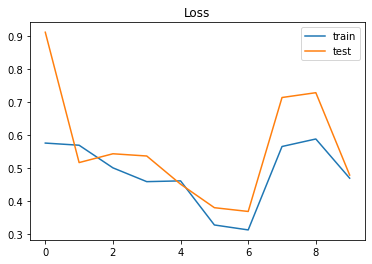

In [48]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

The plot shows the training and the testing loss on each epoch

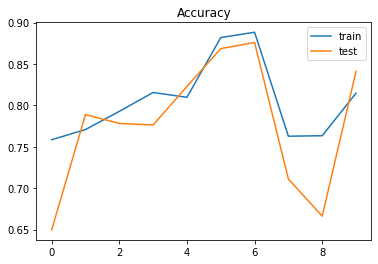

In [51]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

The plot shows the training and the testing accuracy on each epoch.

The RNN model classifies the customer complains at 64 % accuracy on the test dataset.